### Financial Performance Prediction Project

**Financial Performance Prediction**  task is highly creative and can be solved as a traditional ML problem with training models on features to predict targets. The dataset is contains a lot of static metadata characterizing the companies, along with dinamics of change of key financial data points across 11 consecutive quarters.

Alternatively contestants may use a time series approach based on target variables’ values recorded in the previous quarters.

One may also enrich the training/testing with macroeconomic statistics based on time frames present in the datasets - refer to data_dictionary.txt for mapping of quarters indicators in the dataset (Q0 - Q10) to the actual dates.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-performance-prediction/sample_submission.csv
/kaggle/input/financial-performance-prediction/data_dictionary.txt
/kaggle/input/financial-performance-prediction/train.csv
/kaggle/input/financial-performance-prediction/test.csv


#### Import Required Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Load the data set

In [4]:
data_dictionary = pd.read_csv('/kaggle/input/financial-performance-prediction/data_dictionary.txt', delimiter='\t', header = 0)
data_dictionary

,Companies' financial indicators had been collected over the course of 11 quarters (O0 - Q10). The ordering is as follows:
0,Columns starting with Q0 contain the companies...
1,Q1 - is the quarter which went before Q0
2,Q10 - represents the furthest statistics in time
3,----------------------------------------------...
4,Q0 Q1 Q2 Q3 ...
...,...
76,revenuePerShare: The company's total revenue d...
77,freeCashFlow: The cash generated by the compan...
78,operatingCashFlow: The cash generated by the c...
79,revenueGrowth: The percentage increase in the ...


In [5]:
train = pd.read_csv('/kaggle/input/financial-performance-prediction/train.csv')
test = pd.read_csv('/kaggle/input/financial-performance-prediction/test.csv')

In [6]:
# Display the top 5 rows

train.head()

,Id,industry,sector,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,...,Q10_TOTAL_STOCKHOLDERS_EQUITY,Q10_NET_INCOME,Q10_GROSS_PROFIT,Q10_COST_OF_REVENUES,Q10_REVENUES,Q10_OPERATING_INCOME,Q10_OPERATING_EXPENSES,Q10_EBITDA,Q10_DEPRECIATION_AND_AMORTIZATION,Q10_fiscal_year_end
0,196,Personal Services,Consumer Cyclical,1174.0,5.0,10.0,9.0,4.0,8.0,12.549223,...,2.405020e+08,NaN,2.317100e+07,5.431900e+07,4.073200e+07,2150000.0,5946000.0,1.722500e+07,15075000.0,0.0
1,1568,Building Products & Equipment,Industrials,3600.0,4.0,4.0,3.0,4.0,3.0,1222.000000,...,3.265380e+08,-71929000.0,4.105740e+08,6.926880e+08,1.103262e+09,-39287000.0,333229000.0,7.734500e+07,116632000.0,0.0
2,1218,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.066300e+10,603000000.0,1.649000e+09,4.587000e+09,6.236000e+09,663000000.0,214000000.0,1.435000e+09,772000000.0,0.0
3,23,Scientific & Technical Instruments,Technology,143.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2.758000e+03,-9715.0,0.000000e+00,NaN,NaN,-9683.0,9683.0,-9.683000e+03,0.0,0.0
4,783,Drug Manufacturers - Specialty & Generic,Healthcare,36.0,NaN,NaN,NaN,NaN,NaN,1.231544,...,2.592400e+07,-4676000.0,1.205000e+07,0.000000e+00,1.205000e+07,-1594000.0,13644000.0,-1.594000e+06,0.0,0.0


In [7]:
# Show the shape of train and test sets

print('Train Shape:',train.shape)
print('Test Shape:',test.shape)

Train Shape: (1624, 212)
Test Shape: (406, 203)


In [8]:
# check the columns having null data

columns_with_null = train.columns[train.isnull().any()]
print(columns_with_null)

Index(['industry', 'fullTimeEmployees', 'auditRisk', 'boardRisk',
       'compensationRisk', 'shareHolderRightsRisk', 'overallRisk',
       'trailingPE', 'forwardPE', 'floatShares',
       ...
       'Q10_TOTAL_LIABILITIES_AND_EQUITY', 'Q10_TOTAL_STOCKHOLDERS_EQUITY',
       'Q10_NET_INCOME', 'Q10_GROSS_PROFIT', 'Q10_COST_OF_REVENUES',
       'Q10_REVENUES', 'Q10_OPERATING_INCOME', 'Q10_OPERATING_EXPENSES',
       'Q10_EBITDA', 'Q10_DEPRECIATION_AND_AMORTIZATION'],
      dtype='object', length=186)


In [9]:
# display all Columns

pd.set_option('display.max_columns' ,None)

In [10]:
train.isnull().sum().head(50)

Id                                   0
industry                            22
sector                               0
fullTimeEmployees                   80
auditRisk                          493
boardRisk                          493
compensationRisk                   493
shareHolderRightsRisk              493
overallRisk                        493
trailingPE                         902
forwardPE                          188
floatShares                         26
sharesOutstanding                   23
trailingEps                         47
forwardEps                         194
targetHighPrice                    307
targetLowPrice                     307
targetMeanPrice                    307
targetMedianPrice                  307
recommendationMean                 224
recommendationKey                   20
numberOfAnalystOpinions            307
totalCash                           27
totalCashPerShare                   57
ebitda                              54
totalDebt                

In [11]:
train.isnull().sum().tail(50)

Q8_TOTAL_CURRENT_ASSETS               40
Q8_TOTAL_NONCURRENT_ASSETS            47
Q8_TOTAL_LIABILITIES                  25
Q8_TOTAL_CURRENT_LIABILITIES          43
Q8_TOTAL_NONCURRENT_LIABILITIES       43
Q8_TOTAL_LIABILITIES_AND_EQUITY       27
Q8_TOTAL_STOCKHOLDERS_EQUITY          25
Q8_NET_INCOME                        257
Q8_GROSS_PROFIT                       49
Q8_COST_OF_REVENUES                  140
Q8_REVENUES                          136
Q8_OPERATING_INCOME                   55
Q8_OPERATING_EXPENSES                 43
Q8_EBITDA                             53
Q8_DEPRECIATION_AND_AMORTIZATION      61
Q8_fiscal_year_end                     0
Q9_TOTAL_ASSETS                       98
Q9_TOTAL_CURRENT_ASSETS              107
Q9_TOTAL_NONCURRENT_ASSETS           111
Q9_TOTAL_LIABILITIES                  95
Q9_TOTAL_CURRENT_LIABILITIES         111
Q9_TOTAL_NONCURRENT_LIABILITIES      111
Q9_TOTAL_LIABILITIES_AND_EQUITY       97
Q9_TOTAL_STOCKHOLDERS_EQUITY          96
Q9_NET_INCOME   

**Observations**: Based on the above observations we have lot of columns with missing values

In [12]:
# Check the no. of columns with different data types

train.dtypes.value_counts()

float64    207
object       4
int64        1
Name: count, dtype: int64

In [13]:
test.dtypes.value_counts()

float64    198
object       4
int64        1
Name: count, dtype: int64

In [14]:
train.head()

,Id,industry,sector,fullTimeEmployees,auditRisk,boardRisk,compensationRisk,shareHolderRightsRisk,overallRisk,trailingPE,forwardPE,floatShares,sharesOutstanding,trailingEps,forwardEps,targetHighPrice,targetLowPrice,targetMeanPrice,targetMedianPrice,recommendationMean,recommendationKey,numberOfAnalystOpinions,totalCash,totalCashPerShare,ebitda,totalDebt,totalRevenue,revenuePerShare,freeCashflow,operatingCashflow,revenueGrowth,financialCurrency,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY,Q0_GROSS_PROFIT,Q0_COST_OF_REVENUES,Q0_REVENUES,Q0_OPERATING_INCOME,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_fiscal_year_end,Q1_TOTAL_ASSETS,Q1_TOTAL_CURRENT_ASSETS,Q1_TOTAL_NONCURRENT_ASSETS,Q1_TOTAL_LIABILITIES,Q1_TOTAL_CURRENT_LIABILITIES,Q1_TOTAL_NONCURRENT_LIABILITIES,Q1_TOTAL_LIABILITIES_AND_EQUITY,Q1_TOTAL_STOCKHOLDERS_EQUITY,Q1_NET_INCOME,Q1_GROSS_PROFIT,Q1_COST_OF_REVENUES,Q1_REVENUES,Q1_OPERATING_INCOME,Q1_OPERATING_EXPENSES,Q1_EBITDA,Q1_DEPRECIATION_AND_AMORTIZATION,Q1_fiscal_year_end,Q2_TOTAL_ASSETS,Q2_TOTAL_CURRENT_ASSETS,Q2_TOTAL_NONCURRENT_ASSETS,Q2_TOTAL_LIABILITIES,Q2_TOTAL_CURRENT_LIABILITIES,Q2_TOTAL_NONCURRENT_LIABILITIES,Q2_TOTAL_LIABILITIES_AND_EQUITY,Q2_TOTAL_STOCKHOLDERS_EQUITY,Q2_NET_INCOME,Q2_GROSS_PROFIT,Q2_COST_OF_REVENUES,Q2_REVENUES,Q2_OPERATING_INCOME,Q2_OPERATING_EXPENSES,Q2_EBITDA,Q2_DEPRECIATION_AND_AMORTIZATION,Q2_fiscal_year_end,Q3_TOTAL_ASSETS,Q3_TOTAL_CURRENT_ASSETS,Q3_TOTAL_NONCURRENT_ASSETS,Q3_TOTAL_LIABILITIES,Q3_TOTAL_CURRENT_LIABILITIES,Q3_TOTAL_NONCURRENT_LIABILITIES,Q3_TOTAL_LIABILITIES_AND_EQUITY,Q3_TOTAL_STOCKHOLDERS_EQUITY,Q3_NET_INCOME,Q3_GROSS_PROFIT,Q3_COST_OF_REVENUES,Q3_REVENUES,Q3_OPERATING_INCOME,Q3_OPERATING_EXPENSES,Q3_EBITDA,Q3_DEPRECIATION_AND_AMORTIZATION,Q3_fiscal_year_end,Q4_TOTAL_ASSETS,Q4_TOTAL_CURRENT_ASSETS,Q4_TOTAL_NONCURRENT_ASSETS,Q4_TOTAL_LIABILITIES,Q4_TOTAL_CURRENT_LIABILITIES,Q4_TOTAL_NONCURRENT_LIABILITIES,Q4_TOTAL_LIABILITIES_AND_EQUITY,Q4_TOTAL_STOCKHOLDERS_EQUITY,Q4_NET_INCOME,Q4_GROSS_PROFIT,Q4_COST_OF_REVENUES,Q4_REVENUES,Q4_OPERATING_INCOME,Q4_OPERATING_EXPENSES,Q4_EBITDA,Q4_DEPRECIATION_AND_AMORTIZATION,Q4_fiscal_year_end,Q5_TOTAL_ASSETS,Q5_TOTAL_CURRENT_ASSETS,Q5_TOTAL_NONCURRENT_ASSETS,Q5_TOTAL_LIABILITIES,Q5_TOTAL_CURRENT_LIABILITIES,Q5_TOTAL_NONCURRENT_LIABILITIES,Q5_TOTAL_LIABILITIES_AND_EQUITY,Q5_TOTAL_STOCKHOLDERS_EQUITY,Q5_NET_INCOME,Q5_GROSS_PROFIT,Q5_COST_OF_REVENUES,Q5_REVENUES,Q5_OPERATING_INCOME,Q5_OPERATING_EXPENSES,Q5_EBITDA,Q5_DEPRECIATION_AND_AMORTIZATION,Q5_fiscal_year_end,Q6_TOTAL_ASSETS,Q6_TOTAL_CURRENT_ASSETS,Q6_TOTAL_NONCURRENT_ASSETS,Q6_TOTAL_LIABILITIES,Q6_TOTAL_CURRENT_LIABILITIES,Q6_TOTAL_NONCURRENT_LIABILITIES,Q6_TOTAL_LIABILITIES_AND_EQUITY,Q6_TOTAL_STOCKHOLDERS_EQUITY,Q6_NET_INCOME,Q6_GROSS_PROFIT,Q6_COST_OF_REVENUES,Q6_REVENUES,Q6_OPERATING_INCOME,Q6_OPERATING_EXPENSES,Q6_EBITDA,Q6_DEPRECIATION_AND_AMORTIZATION,Q6_fiscal_year_end,Q7_TOTAL_ASSETS,Q7_TOTAL_CURRENT_ASSETS,Q7_TOTAL_NONCURRENT_ASSETS,Q7_TOTAL_LIABILITIES,Q7_TOTAL_CURRENT_LIABILITIES,Q7_TOTAL_NONCURRENT_LIABILITIES,Q7_TOTAL_LIABILITIES_AND_EQUITY,Q7_TOTAL_STOCKHOLDERS_EQUITY,Q7_NET_INCOME,Q7_GROSS_PROFIT,Q7_COST_OF_REVENUES,Q7_REVENUES,Q7_OPERATING_INCOME,Q7_OPERATING_EXPENSES,Q7_EBITDA,Q7_DEPRECIATION_AND_AMORTIZATION,Q7_fiscal_year_end,Q8_TOTAL_ASSETS,Q8_TOTAL_CURRENT_ASSETS,Q8_TOTAL_NONCURRENT_ASSETS,Q8_TOTAL_LIABILITIES,Q8_TOTAL_CURRENT_LIABILITIES,Q8_TOTAL_NONCURRENT_LIABILITIES,Q8_TOTAL_LIABILITIES_AND_EQUITY,Q8_TOTAL_STOCKHOLDERS_EQUITY,Q8_NET_INCOME,Q8_GROSS_PROFIT,Q8_COST_OF_REVENUES,Q8_REVENUES,Q8_OPERATING_INCOME,Q8_OPERATING_EXPENSES,Q8_EBITDA,Q8_DEPRECIATION_AND_AMORTIZATION,Q8_fiscal_year_end,Q9_TOTAL_ASSETS,Q9_TOTAL_CURRENT_ASSETS,Q9_TOTAL_NONCURRENT_ASSETS,Q9_TOTAL_LIABILITIES,Q9_TOTAL_CURRENT_LIABILITIES,Q9_TOTAL_NONCURRENT_LIABILITIES,Q9_TOTAL_LIABILITIES_AND_EQUITY,Q9_TOTAL_STOCKHOLDERS_EQUITY,Q9_NET_INCOME,Q9_GROSS_PROFIT,Q9_COST_OF_REVENUES,Q9_REVENUES,Q9_OPERATING_INCOME,Q9_OPERATING_EXPENSES,Q9_EBITDA,Q9_DEPRECIATION_AND_AMORTIZATION,Q9_f

In [15]:
# Print the name of the columns which are in train and not in test data set
# These are the target columns for our analysis

targets_names = [column for column in train if column not in test]
print('Target columns:\n',targets_names)

Target columns:
 ['Q0_TOTAL_ASSETS', 'Q0_TOTAL_LIABILITIES', 'Q0_TOTAL_STOCKHOLDERS_EQUITY', 'Q0_GROSS_PROFIT', 'Q0_COST_OF_REVENUES', 'Q0_REVENUES', 'Q0_OPERATING_INCOME', 'Q0_OPERATING_EXPENSES', 'Q0_EBITDA']


In [16]:
# Concatenate the train and test sets

train['is_train'] = True
test['is_train'] = False

df = pd.concat([train, test], axis = 0, ignore_index = True)

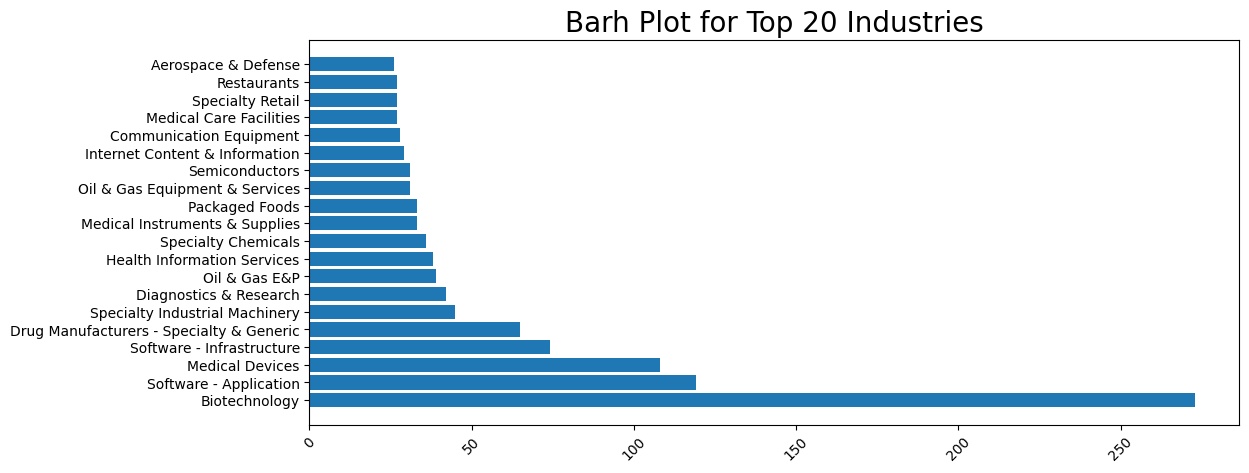

In [17]:
# Barh Plot for Top 20 Industries

plt.figure(figsize=(12,5))
plt.barh(y = df['industry'].value_counts().head(20).index ,width=df['industry'].value_counts().head(20).values)
plt.title('Barh Plot for Top 20 Industries' ,fontsize=20)
plt.xticks(rotation=45)
plt.show()

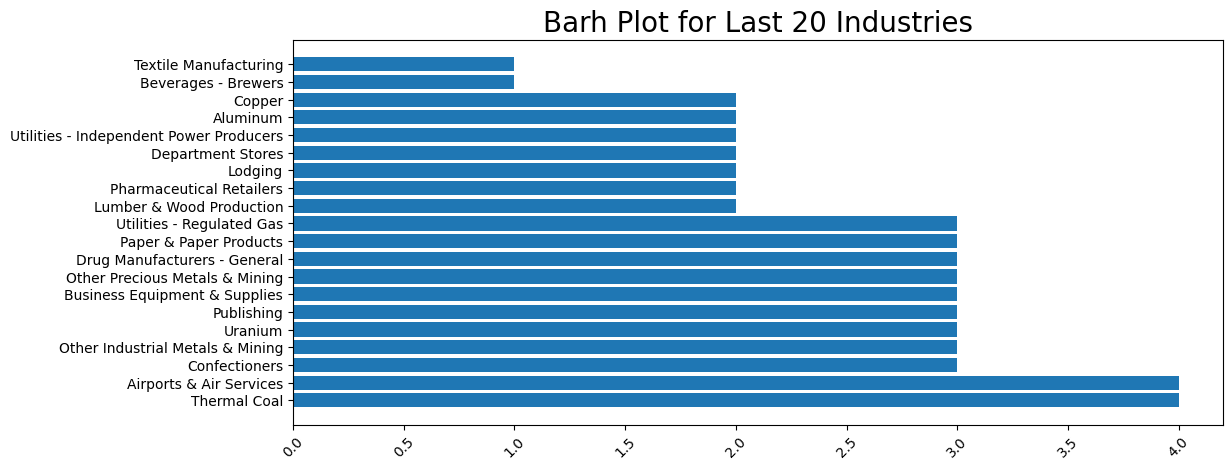

In [18]:
# Barh Plot for Last 20 Industries

plt.figure(figsize=(12,5))
plt.barh(y = df['industry'].value_counts().tail(20).index ,width=df['industry'].value_counts().tail(20).values)
plt.title('Barh Plot for Last 20 Industries' ,fontsize=20)
plt.xticks(rotation=45)
plt.show()

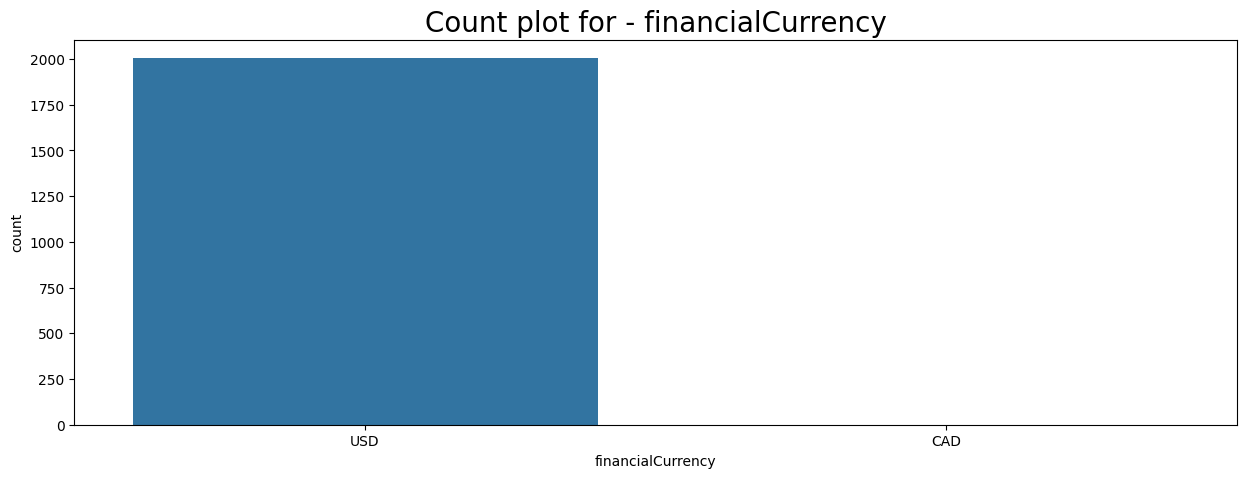

In [19]:
# count plot for "financialCurrency"
plt.figure(figsize=(15,5))
sns.countplot(x=df['financialCurrency'])
plt.title('Count plot for - financialCurrency' ,fontsize=20)
plt.show()

In [20]:
# Select only object data type columns

df.select_dtypes(include = 'O')

,industry,sector,recommendationKey,financialCurrency
0,Personal Services,Consumer Cyclical,strong_buy,USD
1,Building Products & Equipment,Industrials,buy,USD
2,NaN,Unknown,NaN,NaN
3,Scientific & Technical Instruments,Technology,hold,USD
4,Drug Manufacturers - Specialty & Generic,Healthcare,buy,USD
...,...,...,...,...
2025,Packaged Foods,Consumer Defensive,hold,USD
2026,NaN,Unknown,NaN,NaN
2027,Medical Devices,Healthcare,buy,USD
2028,Drug Manufacturers - Specialty & Generic,Healthcare,buy,USD


In [21]:
# Select all the columns based on their data types

df.select_dtypes

<bound method DataFrame.select_dtypes of         Id                                  industry              sector  \
0      196                         Personal Services   Consumer Cyclical   
1     1568             Building Products & Equipment         Industrials   
2     1218                                       NaN             Unknown   
3       23        Scientific & Technical Instruments          Technology   
4      783  Drug Manufacturers - Specialty & Generic          Healthcare   
...    ...                                       ...                 ...   
2025   885                            Packaged Foods  Consumer Defensive   
2026   385                                       NaN             Unknown   
2027   711                           Medical Devices          Healthcare   
2028   272  Drug Manufacturers - Specialty & Generic          Healthcare   
2029  1892                       Specialty Chemicals     Basic Materials   

      fullTimeEmployees  auditRisk  boardRisk 

In [22]:
# print the nunique counts in the object type columns

for col in df.select_dtypes(include = 'O'):
    print(f'{col} unique values num: {df[col].nunique()}')
    print(' '*50)

industry unique values num: 113
                                                  
sector unique values num: 10
                                                  
recommendationKey unique values num: 6
                                                  
financialCurrency unique values num: 2
                                                  


In [23]:
# Function to binarize the categorical columns

def binarize(df, col):
    uniques = list(df[col].dropna().unique())
    df[col] = [1 if val == uniques[0] else 0 for val in df[col]]
    return df

In [24]:
# Function to perform one-hot-encoding

def one_hot_encode(df, col):
    dummies = pd.get_dummies(df[col], prefix = col).astype(int)
    df.drop(col, axis = 1, inplace = True)
    df = pd.concat([df, dummies], axis = 1)
    return df

In [25]:
# Create a function to factorize the categories in the columns

def factorize(df, col):
    mapping = {name: ix for ix, name in enumerate(df[col].unique())}
    df[col] = df[col].map(mapping)
    return df

In [26]:
# Binarize the respective column

df = binarize(df, 'financialCurrency')
print(df['financialCurrency'].head())

0    1
1    1
2    0
3    1
4    1
Name: financialCurrency, dtype: int64


In [27]:
# Apply one-hot-encoding

print("Before encoding",df.shape)
df = one_hot_encode(df, 'sector')
df = one_hot_encode(df, 'recommendationKey')
print("After encoding",df.shape)

Before encoding (2030, 213)
After encoding (2030, 227)


In [28]:
# Apply factorization function

df = factorize(df, 'industry')
print(df.dtypes.value_counts())

float64    207
int64       19
bool         1
Name: count, dtype: int64


In [29]:
# check null values counts

df.isnull().sum()

Id                                  0
industry                            0
fullTimeEmployees                 102
auditRisk                         625
boardRisk                         625
                                 ... 
recommendationKey_hold              0
recommendationKey_none              0
recommendationKey_sell              0
recommendationKey_strong_buy        0
recommendationKey_underperform      0
Length: 227, dtype: int64

In [30]:
# check the Missing data in the columns based on the percentage of the missing data

print('Missing data stats:\n')
under_10_percent = 0
ten_to_20_percent = 0
twenty_to_50_percent = 0
over_50_percent = 0

for col in df:
    if np.any(df[col].isnull()):
        percent_missing = np.round(100*df[col].isnull().sum()/len(df),2)
        if percent_missing < 10:
            under_10_percent+=1
        elif 10 <= percent_missing < 20:
            ten_to_20_percent+=1
        elif 20 <= percent_missing < 50:
            twenty_to_50_percent+=1
        else:
            over_50_percent+=1
        
print(f'ncols with under 10% missing data:\t',under_10_percent)
print(f'ncols with 10-20% missing data:\t\t',ten_to_20_percent)
print(f'ncols with 20-50% missing data:\t\t',twenty_to_50_percent)
print(f'ncols with over 50% missing data:\t',over_50_percent)

Missing data stats:

ncols with under 10% missing data:	 134
ncols with 10-20% missing data:		 44
ncols with 20-50% missing data:		 16
ncols with over 50% missing data:	 1


In [31]:
# Check if any infinite values in the data

df[df == np.inf].count()

Id                                0
industry                          0
fullTimeEmployees                 0
auditRisk                         0
boardRisk                         0
                                 ..
recommendationKey_hold            0
recommendationKey_none            0
recommendationKey_sell            0
recommendationKey_strong_buy      0
recommendationKey_underperform    0
Length: 227, dtype: int64

In [32]:
# check if there are any inf values in data

df[df == np.inf].count().sum()

17

In [33]:
# check for missing values in the target columns

train[targets_names].isnull().sum()

Q0_TOTAL_ASSETS                 0
Q0_TOTAL_LIABILITIES            0
Q0_TOTAL_STOCKHOLDERS_EQUITY    0
Q0_GROSS_PROFIT                 0
Q0_COST_OF_REVENUES             0
Q0_REVENUES                     0
Q0_OPERATING_INCOME             0
Q0_OPERATING_EXPENSES           0
Q0_EBITDA                       0
dtype: int64

**Observation**: We can see we don't have any missing values in the tager columns.

##### Imputing the missing values

In [34]:
def impute_missing_by_median(df):
    print(f'Missing values before imputation: {sum(df.isnull().sum())}')
    # first replace inf and -inf with nan
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    # then impute nan by median
    for col in df:
        if np.any(df[col].isnull()):
            df[col].fillna(df[col].median(), inplace = True)
    print(f'Missing values after imputation: {sum(df.isnull().sum())}')
    return df

In [35]:
df = impute_missing_by_median(df)

Missing values before imputation: 28653
Missing values after imputation: 0


In [36]:
train = df[df['is_train'] == True]
test = df[df['is_train'] == False]
train.drop('is_train', axis = 1, inplace=True)
test.drop('is_train', axis = 1, inplace=True)
test.reset_index(drop = True, inplace = True)

test.drop(targets_names, axis = 1, inplace = True)
targets = train[targets_names].copy()
train.drop(targets_names, axis = 1, inplace = True)

#### Training the Model
- Using various algorithms

#### XGBOOST Regressor

In [37]:
from sklearn.model_selection import cross_val_score as cvs
from xgboost import XGBRegressor

modelXG = XGBRegressor()

In [38]:
# Perform Cross Validation

print('Cross validation R2 scores for each target:\n')
cross_val_score_results = {}
for target in targets:
    score = np.round(np.mean(cvs(modelXG, train, targets[target], cv=3, scoring='r2')),2)
    cross_val_score_results[target] = score
    print(f'{target} -> {score}')
print(f'\nMean R2 score across all targets: {round(np.mean(list(cross_val_score_results.values())),2)}')

Cross validation R2 scores for each target:

Q0_TOTAL_ASSETS -> 0.62
Q0_TOTAL_LIABILITIES -> 0.4
Q0_TOTAL_STOCKHOLDERS_EQUITY -> 0.87
Q0_GROSS_PROFIT -> 0.73
Q0_COST_OF_REVENUES -> 0.83
Q0_REVENUES -> 0.9
Q0_OPERATING_INCOME -> 0.72
Q0_OPERATING_EXPENSES -> 0.76
Q0_EBITDA -> -0.42

Mean R2 score across all targets: 0.6


In [39]:
predXG = {}
for target in targets:
    modelXG.fit(train, targets[target])
    pred = modelXG.predict(test)
    predXG[target] = pred
    print(f'Finished train/predict for: {target}')

Finished train/predict for: Q0_TOTAL_ASSETS
Finished train/predict for: Q0_TOTAL_LIABILITIES
Finished train/predict for: Q0_TOTAL_STOCKHOLDERS_EQUITY
Finished train/predict for: Q0_GROSS_PROFIT
Finished train/predict for: Q0_COST_OF_REVENUES
Finished train/predict for: Q0_REVENUES
Finished train/predict for: Q0_OPERATING_INCOME
Finished train/predict for: Q0_OPERATING_EXPENSES
Finished train/predict for: Q0_EBITDA


#### Performing using Random Forrest Regressor

In [40]:
from sklearn.ensemble import RandomForestRegressor
modelRF = RandomForestRegressor()

In [41]:
# Perform Cross Validation

print('Cross validation R2 scores for each target:\n')
cross_val_score_results = {}
for target in targets:
    score = np.round(np.mean(cvs(modelRF, train, targets[target], cv=3, scoring='r2')),2)
    cross_val_score_results[target] = score
    print(f'{target} -> {score}')
print(f'\nMean R2 score across all targets: {round(np.mean(list(cross_val_score_results.values())),2)}')

Cross validation R2 scores for each target:

Q0_TOTAL_ASSETS -> 0.7
Q0_TOTAL_LIABILITIES -> 0.69
Q0_TOTAL_STOCKHOLDERS_EQUITY -> 0.79
Q0_GROSS_PROFIT -> 0.86
Q0_COST_OF_REVENUES -> 0.92
Q0_REVENUES -> 0.95
Q0_OPERATING_INCOME -> 0.77
Q0_OPERATING_EXPENSES -> 0.83
Q0_EBITDA -> 0.46

Mean R2 score across all targets: 0.77


In [42]:
predRF = {}
for target in targets:
    modelRF.fit(train, targets[target])
    pred = modelRF.predict(test)
    predRF[target] = pred
    print(f'Finished train/predict for: {target}')

Finished train/predict for: Q0_TOTAL_ASSETS
Finished train/predict for: Q0_TOTAL_LIABILITIES
Finished train/predict for: Q0_TOTAL_STOCKHOLDERS_EQUITY
Finished train/predict for: Q0_GROSS_PROFIT
Finished train/predict for: Q0_COST_OF_REVENUES
Finished train/predict for: Q0_REVENUES
Finished train/predict for: Q0_OPERATING_INCOME
Finished train/predict for: Q0_OPERATING_EXPENSES
Finished train/predict for: Q0_EBITDA


#### Using Decision Tree

In [43]:
from sklearn.tree import DecisionTreeRegressor
modelDT = DecisionTreeRegressor()

In [44]:
print('Cross validation R2 scores for each target:\n')
cross_val_score_results = {}
for target in targets:
    score = np.round(np.mean(cvs(modelDT, train, targets[target], cv=3, scoring='r2')),2)
    cross_val_score_results[target] = score
    print(f'{target} -> {score}')
print(f'\nMean R2 score across all targets: {round(np.mean(list(cross_val_score_results.values())),2)}')

Cross validation R2 scores for each target:

Q0_TOTAL_ASSETS -> 0.71
Q0_TOTAL_LIABILITIES -> 0.71
Q0_TOTAL_STOCKHOLDERS_EQUITY -> 0.63
Q0_GROSS_PROFIT -> 0.72
Q0_COST_OF_REVENUES -> 0.78
Q0_REVENUES -> 0.92
Q0_OPERATING_INCOME -> 0.45
Q0_OPERATING_EXPENSES -> 0.09
Q0_EBITDA -> -0.26

Mean R2 score across all targets: 0.53


In [45]:
predDT = {}
for target in targets:
    modelDT.fit(train, targets[target])
    pred2 = modelDT.predict(test)
    predDT[target] = pred2
    print(f'Finished train/predict for: {target}')

Finished train/predict for: Q0_TOTAL_ASSETS
Finished train/predict for: Q0_TOTAL_LIABILITIES
Finished train/predict for: Q0_TOTAL_STOCKHOLDERS_EQUITY
Finished train/predict for: Q0_GROSS_PROFIT
Finished train/predict for: Q0_COST_OF_REVENUES
Finished train/predict for: Q0_REVENUES
Finished train/predict for: Q0_OPERATING_INCOME
Finished train/predict for: Q0_OPERATING_EXPENSES
Finished train/predict for: Q0_EBITDA


In [46]:
from sklearn.ensemble import AdaBoostRegressor
modelAB = AdaBoostRegressor()

In [47]:
print('Cross validation R2 scores for each target:\n')
cross_val_score_results = {}
for target in targets:
    score = np.round(np.mean(cvs(modelAB, train, targets[target], cv=3, scoring='r2')),2)
    cross_val_score_results[target] = score
    print(f'{target} -> {score}')
print(f'\nMean R2 score across all targets: {round(np.mean(list(cross_val_score_results.values())),2)}')

Cross validation R2 scores for each target:

Q0_TOTAL_ASSETS -> 0.77
Q0_TOTAL_LIABILITIES -> 0.78
Q0_TOTAL_STOCKHOLDERS_EQUITY -> 0.8
Q0_GROSS_PROFIT -> 0.85
Q0_COST_OF_REVENUES -> 0.9
Q0_REVENUES -> 0.86
Q0_OPERATING_INCOME -> 0.74
Q0_OPERATING_EXPENSES -> 0.82
Q0_EBITDA -> 0.5

Mean R2 score across all targets: 0.78


In [48]:
predAB = {}
for target in targets:
    modelAB.fit(train, targets[target])
    pred3 = modelAB.predict(test)
    predAB[target] = pred3
    print(f'Finished train/predict for: {target}')

Finished train/predict for: Q0_TOTAL_ASSETS
Finished train/predict for: Q0_TOTAL_LIABILITIES
Finished train/predict for: Q0_TOTAL_STOCKHOLDERS_EQUITY
Finished train/predict for: Q0_GROSS_PROFIT
Finished train/predict for: Q0_COST_OF_REVENUES
Finished train/predict for: Q0_REVENUES
Finished train/predict for: Q0_OPERATING_INCOME
Finished train/predict for: Q0_OPERATING_EXPENSES
Finished train/predict for: Q0_EBITDA


#### Evaluating using the submission file

In [49]:
sub = pd.read_csv('/kaggle/input/financial-performance-prediction/sample_submission.csv')

In [50]:
sub.head()

,Id,Q0_REVENUES,Q0_COST_OF_REVENUES,Q0_GROSS_PROFIT,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_OPERATING_INCOME,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY
0,480,0,0,0,0,0,0,0,0,0
1,573,0,0,0,0,0,0,0,0,0
2,1967,0,0,0,0,0,0,0,0,0
3,57,0,0,0,0,0,0,0,0,0
4,131,0,0,0,0,0,0,0,0,0


In [51]:
sub.shape

(406, 10)

In [52]:
# compare with test set if the ids are matching

sub.Id == test.Id

0      True
1      True
2      True
3      True
4      True
       ... 
401    True
402    True
403    True
404    True
405    True
Name: Id, Length: 406, dtype: bool

In [53]:
# check if any mismatch

(sub['Id'] != test['Id']).any()

False

In [54]:
# Update the sub data set with the targets from preds

for target in predRF:
    sub[target] = predRF[target]
sub.head()

,Id,Q0_REVENUES,Q0_COST_OF_REVENUES,Q0_GROSS_PROFIT,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_OPERATING_INCOME,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY
0,480,6.078520e+03,1.600400e+02,5.422230e+03,4.271063e+05,-5.475964e+05,-551754.85,3.010979e+06,4.983638e+06,3.097911e+06
1,573,6.193522e+08,3.626583e+08,2.258496e+08,1.007877e+08,9.737365e+07,42364350.00,3.756715e+09,1.455034e+09,3.545557e+08
2,1967,4.539324e+06,3.263549e+06,9.660713e+05,9.413518e+05,-4.233575e+06,-3018366.99,2.035885e+07,1.560165e+07,4.423343e+06
3,57,4.325188e+08,2.587042e+08,1.727804e+08,8.471040e+07,6.393556e+07,78180305.29,5.627533e+09,2.743880e+09,3.172262e+09
4,131,1.030288e+09,8.404734e+08,2.159029e+08,8.388701e+07,1.132116e+08,90269655.29,4.308041e+09,3.059534e+09,1.178623e+09


In [55]:
sub.to_csv('submission.csv', index = False)

In [56]:
pd.read_csv('submission.csv')

,Id,Q0_REVENUES,Q0_COST_OF_REVENUES,Q0_GROSS_PROFIT,Q0_OPERATING_EXPENSES,Q0_EBITDA,Q0_OPERATING_INCOME,Q0_TOTAL_ASSETS,Q0_TOTAL_LIABILITIES,Q0_TOTAL_STOCKHOLDERS_EQUITY
0,480,6.078520e+03,1.600400e+02,5.422230e+03,4.271063e+05,-5.475964e+05,-5.517548e+05,3.010979e+06,4.983638e+06,3.097911e+06
1,573,6.193522e+08,3.626583e+08,2.258496e+08,1.007877e+08,9.737365e+07,4.236435e+07,3.756715e+09,1.455034e+09,3.545557e+08
2,1967,4.539324e+06,3.263549e+06,9.660713e+05,9.413518e+05,-4.233575e+06,-3.018367e+06,2.035885e+07,1.560165e+07,4.423343e+06
3,57,4.325188e+08,2.587042e+08,1.727804e+08,8.471040e+07,6.393556e+07,7.818031e+07,5.627533e+09,2.743880e+09,3.172262e+09
4,131,1.030288e+09,8.404734e+08,2.159029e+08,8.388701e+07,1.132116e+08,9.026966e+07,4.308041e+09,3.059534e+09,1.178623e+09
...,...,...,...,...,...,...,...,...,...,...
401,885,1.676596e+09,1.072324e+09,6.274682e+08,3.650405e+08,2.340114e+08,2.168229e+08,1.306959e+10,8.063938e+09,5.091622e+09
402,385,3.049760e+08,1.828320e+08,-5.214000e+06,9.849400e+07,-1.034099e+08,-1.037080e+08,2.376172e+09,1.870997e+09,4.869933e+08
403,711,1.364326e+07,4.278387e+06,9.726069e+06,1.950674e+07,-1.000289e+07,-1.013775e+07,8.873549e+07,5.672816e+07,3.413246e+07
404,272,1.131264e+08,2.614176e+07,9.458801e+07,8.221551e+07,7.538123e+06,5.474110e+06,4.424068e+08,1.848028e+08,2.780810e+08
